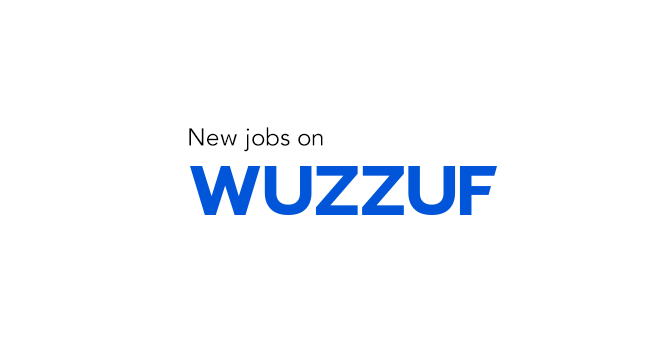

### Importing Libraries & Methods

In [1]:
from bs4 import BeautifulSoup as bs

In [2]:
from urllib.request import urlopen

### Inputting the URL

In [3]:
url = 'https://wuzzuf.net/search/jobs/?a=hpb%7Cspbg&filters%5Bcity%5D%5B0%5D=Abu%20Dhabi&filters%5Bcity%5D%5B1%5D=Dubai&q=data%20analysis'

### Creat a Client-based  Request to get the URL

In [4]:
client = urlopen(url)

### Getting the HTML Code of the full page

In [5]:
html = client.read()

In [6]:
html

b'<!DOCTYPE html>\n<html lang="en" translate="no">\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, shrink-to-fit=no">\n    <meta http-equiv="expires" content="Thu Dec 08 2022 18:30:44 GMT+0200" />\n\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="cache-control" content="no-cache, no-store, must-revalidate">\n    <meta name="googlebot" content="notranslate">\n    <title data-react-helmet="true">Job Search | WUZZUF</title>\n\n<meta data-react-helmet="true" charset="utf-8"/><meta data-react-helmet="true" name="description" content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services."/><meta data-react-helmet="true" name="keywords" content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employmen

### Closing the Request

In [7]:
client.close()

### Creating a HTML Parser Using BeautifulSoup

In [8]:
soup = bs(html, "html.parser")

In [9]:
soup

<!DOCTYPE html>

<html lang="en" translate="no">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport"/>
<meta content="Thu Dec 08 2022 18:30:44 GMT+0200" http-equiv="expires">
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="cache-control"/>
<meta content="notranslate" name="googlebot"/>
<title data-react-helmet="true">Job Search | WUZZUF</title>
<meta charset="utf-8" data-react-helmet="true"><meta content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services." data-react-helmet="true" name="description"><meta content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employment in egypt, Egypt jobs, jobs vacancies, job vacancies in egypt, job search egypt, job v

### Creating a Container for the Needed Data

In [10]:
containers = soup.find_all('div',{'class': 'css-1gatmva e1v1l3u10'})

In [11]:
len(containers)

15

In [12]:
bs.prettify(containers[0])

'<div class="css-1gatmva e1v1l3u10">\n <style data-emotion="css pkv5jc">\n  .css-pkv5jc{position:relative;min-height:60px;}\n </style>\n <div class="css-pkv5jc">\n  <a href="https://wuzzuf.net/jobs/careers/Blackstone eIT Aggregated-Saudi Arabia-97585" rel="noreferrer" target="_blank">\n   <style data-emotion="css 17095x3">\n    .css-17095x3{position:absolute;right:0;top:0;width:60px;height:60px;object-fit:contain;object-position:center center;}\n   </style>\n  </a>\n  <style data-emotion="css laomuu">\n   .css-laomuu{padding-right:60px;}\n  </style>\n  <div class="css-laomuu">\n   <style data-emotion="css m604qf">\n    .css-m604qf{font-size:16px;font-weight:600;font-style:normal;letter-spacing:-0.4px;line-height:24px;color:#0055D9;margin:0;}\n   </style>\n   <h2 class="css-m604qf">\n    <style data-emotion="css o171kl">\n     .css-o171kl{-webkit-text-decoration:none;text-decoration:none;color:inherit;}\n    </style>\n    <a class="css-o171kl" href="https://wuzzuf.net/jobs/p/HjwLEc9TLyd

### Accessing Page Elements

In [13]:
containers[0].div.h2.text

'Data Engineer'

In [14]:
jobTitle = containers[0].div.h2.text
jobTitle

'Data Engineer'

In [15]:
jobTitle = containers[0].findAll('h2', {'class': 'css-m604qf'})

In [16]:
jobTitle[0].text

'Data Engineer'

In [17]:
company_name = containers[0].findAll('a', {'class': 'css-17s97q8'})

In [18]:
company_name[0].text

'Blackstone eIT -'

In [19]:
job_place = containers[0].findAll('span', {'class': 'css-5wys0k'})

In [20]:
job_place[0].text

'Dubai, United Arab Emirates '

In [21]:
job_type = containers[0].findAll('span', {'class': 'css-1ve4b75 eoyjyou0'})

In [22]:
job_type[0].text

'Full Time'

### Bringing it All Together

In [23]:
file = open('C:/Users/ZMZM/Desktop/Dataset/wuzzuf.csv', 'w')
header = "job_title, company_name, job_place, job_type\n"
file.write(header)

45

In [24]:
for container in containers:
    jobTitle = container.findAll('h2', {'class': 'css-m604qf'})
    job_title = jobTitle[0].text.strip()
    
    company_name = container.findAll('a', {'class': 'css-17s97q8'})
    company_name = company_name[0].text.strip()
    
    job_place = container.findAll('span', {'class': 'css-5wys0k'})
    job_place = job_place[0].text.strip()
    
    job_type = container.findAll('span', {'class': 'css-1ve4b75 eoyjyou0'})
    job_type = job_type[0].text
    
    file.write(job_title + ", " + company_name + ", " + job_place + ", " + job_type + "\n")
file.close()

### Unputting the file into pandas

In [27]:
import pandas as pd
pd.read_csv('C:/Users/ZMZM/Desktop/Dataset/wuzzuf.csv') 


,job_title,company_name,job_place,job_type
Data Engineer,Blackstone eIT -,Dubai,United Arab Emirates,Full Time
Data Scientist,Etihad Airways -,Abu Dhabi,United Arab Emirates,Full Time
Data Privacy Analyst,Transguard group -,Dubai,United Arab Emirates,Full Time
Data Analyst,Momos -,Dubai,United Arab Emirates,Full Time
People Data Analytics Specialist | Retail | Corporate,Al Futtaim Group -,Dubai,United Arab Emirates,Full Time
Sales Data Analytics Specialist,Merck Sharp & Dohme Corp -,Dubai,United Arab Emirates,Full Time
National_HR Analyst - Offboarding,Al Futtaim Group -,Dubai,United Arab Emirates,Full Time
Digital Marketing Intern MENA,Brainport Eindhoven -,Dubai,United Arab Emirates,Full Time
Digital Marketing Intern MENA,Philips Ultrasound -,Dubai,United Arab Emirates,Full Time
Data Center Engineering Operations Internship - UAE National Only,Amazon Data Services Emirates LLC - Dubai Bra...,Dubai,United Arab Emirates,Full Time


#

# Regards, Tariq Ibrahim